In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

GAMES_TITLES_SALES = 'gamesStatistic.csv'

tb= pd.read_csv(GAMES_TITLES_SALES)

print(tb.head)

<bound method NDFrame.head of                                          title total_sales total_shipped  \
0                             Professor Layton         NaN        18.00m   
1                  Need for Speed: Most Wanted         NaN        17.80m   
2              Pokémon Diamond / Pearl Version         NaN        17.67m   
3                                   Elden Ring         NaN        17.50m   
4                  Grand Theft Auto: Vice City         NaN        17.50m   
...                                        ...         ...           ...   
62321       Zombieland: Double Tap - Road Trip         NaN           NaN   
62322                                Zombillie         NaN           NaN   
62323  Zone of the Enders: The 2nd Runner MARS         NaN           NaN   
62324   Zoo Tycoon: Ultimate Animal Collection         NaN           NaN   
62325   Zoo Tycoon: Ultimate Animal Collection         NaN           NaN   

                        publisher                   devel

C:\Users\alexa\AppData\Local\Temp\ipykernel_26420\2270641222.py:7: DtypeWarning: Columns (1,2,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  tb= pd.read_csv(GAMES_TITLES_SALES)


In [36]:
def convert_value(value):
    try:
        if value == 'Unknown':
            raise ValueError("Valor desconocido encontrado")
        return float(value.replace('m', '')) * 1e6  # Remover 'm' y convertir a millones
    except ValueError as e:
        print(f"Error: {e} en el valor '{value}'")
        return 0  # O puedes devolver un valor predeterminado, como 0

tb['total_shipped'] = tb['total_shipped'].apply(convert_value)
print(tb)

Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor desconocido encontrado en el valor 'Unknown'
Error: Valor d

In [18]:
#exploracion Inicial

print(tb.info())
print(tb.describe())

#identificar variables mas importantes
#title,total_shipped,platform,developer

df_selected = tb[['title', 'total_shipped','platform','developer']]

print("----------------------------------------")
print(df_selected.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62326 entries, 0 to 62325
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           62326 non-null  object 
 1   total_sales     18789 non-null  object 
 2   total_shipped   4218 non-null   object 
 3   publisher       62326 non-null  object 
 4   developer       62309 non-null  object 
 5   release_date    56610 non-null  object 
 6   platform        62326 non-null  object 
 7   japan_sales     6676 non-null   object 
 8   na_sales        12588 non-null  object 
 9   other_sales     15065 non-null  object 
 10  pal_sales       12789 non-null  object 
 11  pos             62326 non-null  int64  
 12  user_score      405 non-null    float64
 13  vgchartz_score  2163 non-null   float64
 14  critic_score    6535 non-null   float64
 15  last_update     16296 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 7.6+ MB
None
             

In [27]:
#determinar misisng values 
valores_Faltantes = tb.isnull().sum()
print(valores_Faltantes[valores_Faltantes > 0])

#inputacion de valores faltante

tb.fillna(tb.median(numeric_only=True), inplace=True)


total_sales      43537
total_shipped    58108
developer           17
release_date      5716
japan_sales      55650
na_sales         49738
other_sales      47261
pal_sales        49537
last_update      46030
dtype: int64


In [31]:
valores_Faltantes = tb.isnull().sum()
print(valores_Faltantes[valores_Faltantes > 0])

tb.fillna(value={
                  'total_sales': 'Unknown',
                  'total_shipped': 'Unknown',
                  'developer': 'Unknown',
                  'release_date': 'Unknown',
                  'japan_sales': 'Unknown',
                  'na_sales': 'Unknown',
                  'other_sales': 'Unknown',
                  'pal_sales': 'Unknown',
                  'last_update': 'Unknown',
                }, inplace=True)

valores_Faltantes = tb.isnull().sum()
print(valores_Faltantes[valores_Faltantes > 0])

Series([], dtype: int64)
Series([], dtype: int64)


0    18000000.0
1    17800000.0
2    17670000.0
3    17500000.0
4    17500000.0
Name: total_shipped, dtype: float64


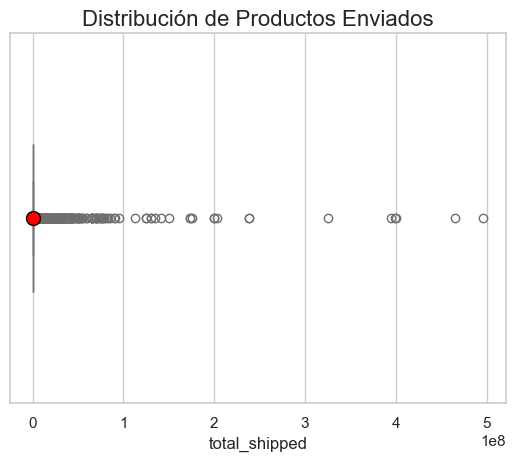

In [46]:
box = sns.boxplot(
    x=tb["total_shipped"], 
    color="skyblue", 
    width=0.4, 
    showmeans=True,  
    meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"} 
)
plt.title("Distribución de Productos Enviados", fontsize=16)
print(tb["total_shipped"].head())
plt.show()

In [49]:
import numpy as np
from scipy import stats
tb = tb[(np.abs(stats.zscore(tb['total_shipped'])) < 3)]

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
tb['total_shipped_scaled'] = scaler.fit_transform(tb[['total_shipped']])


C:\Users\alexa\AppData\Local\Temp\ipykernel_26420\2439556070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb['total_shipped_scaled'] = scaler.fit_transform(tb[['total_shipped']])


In [51]:
min_max_scaler = MinMaxScaler()
tb['total_shipped_normalized'] = min_max_scaler.fit_transform(tb[['total_shipped']])
print(tb[['total_shipped', 'total_shipped_scaled', 'total_shipped_normalized']].head())


    total_shipped  total_shipped_scaled  total_shipped_normalized
16     16590000.0             18.496622                  1.000000
17     16530000.0             18.429213                  0.996383
18     16400000.0             18.283160                  0.988547
19     16290000.0             18.159577                  0.981917
20     16250000.0             18.114638                  0.979506


C:\Users\alexa\AppData\Local\Temp\ipykernel_26420\2139142999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb['total_shipped_normalized'] = min_max_scaler.fit_transform(tb[['total_shipped']])


In [54]:
def parse_date(date_str):
    formats = ['%dth %b %y', '%d %b %y', '%d %B %Y']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt, errors='coerce')
        except ValueError:
            continue
    return pd.NaT 


tb['release_date_datetime'] = tb['release_date'].apply(parse_date)
tb['last_update_datetime'] = tb['last_update'].apply(parse_date)



In [55]:
origin= pd.read_csv(GAMES_TITLES_SALES)

print("Antes del preprocesamiento:")
print(origin.describe())
print("Después del preprocesamiento:")
print(tb.describe())

Antes del preprocesamiento:
                pos  user_score  vgchartz_score  critic_score
count  62326.000000  405.000000     2163.000000   6535.000000
mean   31299.870953    8.063704        7.128618      7.214139
std    18060.627416    1.659802        1.530425      1.456642
min        1.000000    1.000000        1.000000      1.000000
25%    15582.250000    7.500000        6.200000      6.400000
50%    31355.500000    8.500000        7.400000      7.500000
75%    46936.750000    9.100000        8.300000      8.300000
max    62518.000000   10.000000       10.000000     10.000000
Después del preprocesamiento:
       total_shipped           pos    user_score  vgchartz_score  \
count   6.211200e+04  62112.000000  62112.000000    62112.000000   
mean    1.263706e+05  31407.339564      8.497110        7.390401   
min     0.000000e+00    164.000000      1.000000        1.000000   
25%     0.000000e+00  15742.750000      8.500000        7.400000   
50%     0.000000e+00  31462.500000      8.50

C:\Users\alexa\AppData\Local\Temp\ipykernel_26420\2153488354.py:1: DtypeWarning: Columns (1,2,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  origin= pd.read_csv(GAMES_TITLES_SALES)
